<a href="https://colab.research.google.com/github/Ravenha/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Bethany_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
# Import libraries
import pandas as pd
import requests
import urllib.request
import time
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.decomposition import PCA
from collections import OrderedDict
from datetime import date
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
from itertools import groupby
from math import sqrt
from numpy import linalg as LA
from mpl_toolkits import mplot3d
from numpy.linalg import matrix_rank
from matplotlib.patches import Polygon, Circle, Rectangle

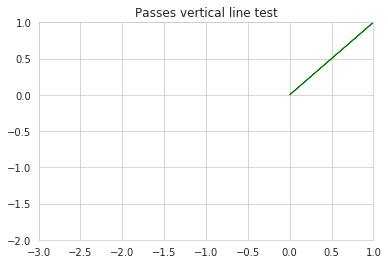

In [19]:
lineV = [1,1]
plt.arrow(0,0, lineV[0], lineV[1], color ='green')
plt.xlim(-3,1); plt.ylim(-2,1)
plt.title("Passes vertical line test")
plt.show()

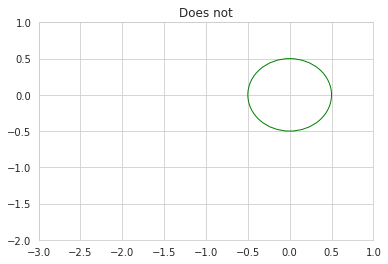

In [18]:
lineV = [0,0]
circle0 = plt.Circle((lineV[0], lineV[1]),0.5, linewidth=1, fill=False, color ='green')
fig, ax = plt.subplots()
plt.xlim(-3,1); plt.ylim(-2,1)
plt.title("Does not")
ax.add_artist(circle0)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

they have multiple outputs

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

1 3 4 5 are not functions because they have multiple values for x, 2 is a function because there is only one value for the output

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Dimensionalities > 

m input: 3 | m output: 1

n input: 4 | n output: 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes You can indeed have a linear map from a "low-dimensional" space to a "high-dimensional" one However, such a map will "miss" most of the target space. 

f:V→W, the range or image of f is the set of vectors in W that are actually hit by something in V:
im(f)={w∈W:∃v∈V(f(v)=w)}.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
def p(x1, x2):
  top = x1 + 3*x2
  bottom = 2*x2 - x1
  return [top,bottom]

def q(x1,x2,x3):
  top = 4*x1+x2+2*x3
  middle = 2*x2-x1+3*x3
  bottom = 5*x1-2*x3+x2
  return [top,middle,bottom]

Tp = [[1,3],
      [-1,2]]
Tq = [[4,1,2],
      [-1,2,3],
      [5,1,-2]] 

bigQ = [0,1]
bigZ = [1,2,3]

#2d
print("Manual:",p(bigQ[0],bigQ[1]))
print("Library:",np.matmul(Tp,bigQ))

#3d
print("Manual:",q(bigZ[0],bigZ[1],bigZ[2]))
print("Library:",np.matmul(Tq,bigZ))

Manual: [3, 2]
Library: [3 2]
Manual: [12, 12, 1]
Library: [12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

eigenvectors are the parts of the matrix transformation that don't move

Eigenvalues is just how stretched or squished that eigenvector is

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

complexity

can be difficult to show visually

if you want to manipulate the data you have to start finding which dimensions are important

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

you want the sufficient # of rows for data. You can't have the parameters be close to the amount of observations because they'll overfit, and the parameters can't be much lower in comparison to the observations because then it'll underfit

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

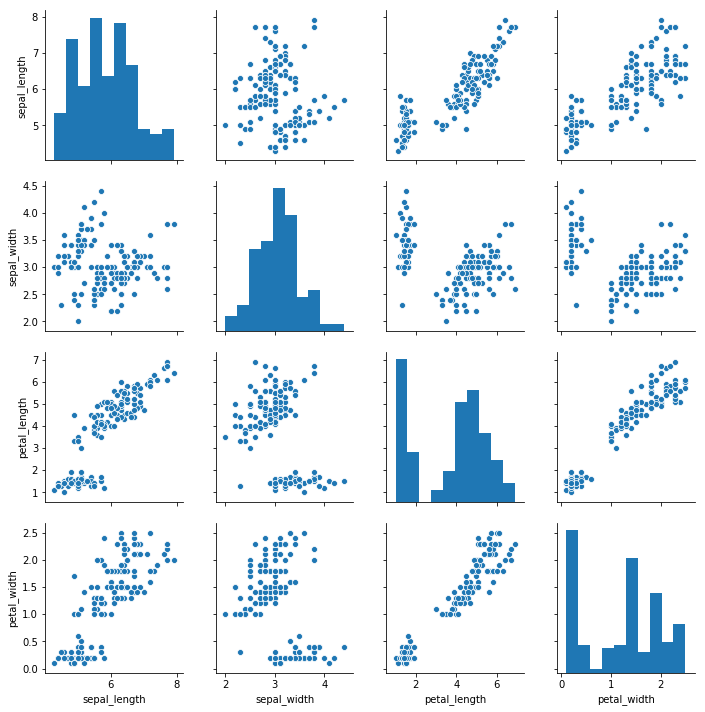

In [6]:
sns.pairplot(iris);

In [7]:
pca = PCA(2)
df_a = iris.copy()
iris['species_name'] = df_a.species
df_a.species = df_a.species.replace({'setosa':0,'versicolor':1,'virginica':2})
pca.fit(df_a)

print("\n vectors: \n", pca.components_)
print("\n values: \n",pca.explained_variance_)
# transform data
B = pca.transform(df_a)
print("\n Projected Data: \n", B)


 vectors: 
 [[ 0.33418606 -0.07826103  0.80046289  0.33708273  0.35753221]
 [ 0.68858026  0.68410307 -0.09876295 -0.06819839 -0.2084588 ]]

 values: 
 [4.83503474 0.25208634]

 Projected Data: 
 [[-2.86550669  0.30278044]
 [-2.89321339 -0.17698715]
 [-3.0557491  -0.16800629]
 [-2.92124902 -0.32502721]
 [-2.9067514   0.30233272]
 [-2.48899988  0.73972719]
 [-2.99106535 -0.11673983]
 [-2.81105291  0.15563581]
 [-3.05248032 -0.58968758]
 [-2.85470148 -0.11163329]
 [-2.70085679  0.63629884]
 [-2.79784383  0.00804347]
 [-2.96034027 -0.23902533]
 [-3.36757216 -0.55368658]
 [-2.83079955  1.14659075]
 [-2.58796715  1.30810539]
 [-2.80918503  0.77923237]
 [-2.83179842  0.2959606 ]
 [-2.41462623  0.8847108 ]
 [-2.77523044  0.49131523]
 [-2.51728591  0.41131533]
 [-2.73369607  0.41608508]
 [-3.36061098  0.0664058 ]
 [-2.5085908   0.11587143]
 [-2.55770496 -0.02158542]
 [-2.69970221 -0.12788171]
 [-2.66359007  0.13211984]
 [-2.7520418   0.36176217]
 [-2.82426199  0.30322816]
 [-2.81561023 -0.1976

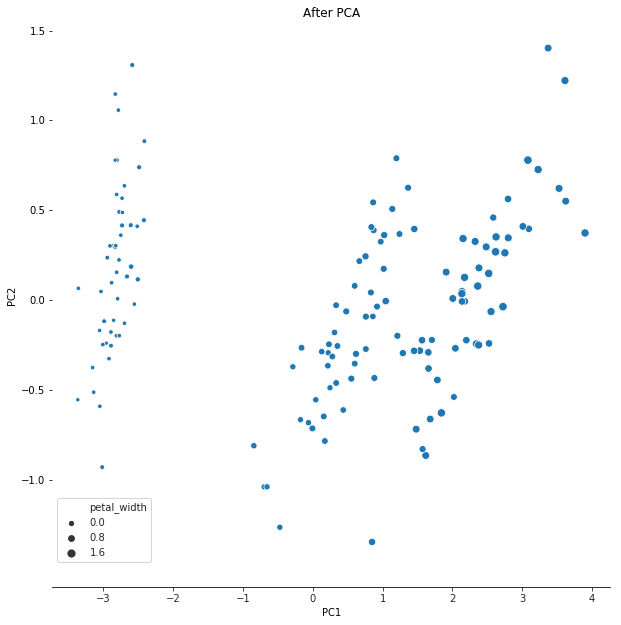

In [8]:
B = B.T
dims = (10,10)
fig, ax = pyplot.subplots(figsize=dims) 
sns.set_style("whitegrid")
sns.axes_style('dark')
sns.despine(offset=20,left=True)
g = sns.scatterplot(x=B[0], y=B[1], size=df_a['petal_width'], 
                    data=df_a, legend='brief')
g.set_ylabel("PC2")
g.set_xlabel("PC1")

leg = plt.legend(frameon=False)
handles, labels = ax.get_legend_handles_labels()
handlesNew = handles

del handlesNew[4:]

ax.legend(handlesNew,labels)
plt.title("After PCA")
plt.show(g)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)